# Visualizing the loss and the error of the model

Given our diagnostics data, we want to know where exactly our models performs badly. From the 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

## Quattro Stagioni

Performance | total score | SIC | SOD | FLOE
---|---|---|---|---
`Pizza Quattro Stagioni` | 77.7 | 83.82 | 77.50 | 66.13

`Pizza Quattro Stagioni` - 6-lvl u-net with transfer learning from `Pizza Marinara` (half the learning rate), regression loss, diagnostics output and reweighting sampler: `40 epochs`, `'unet_conv_filters': [16, 32, 32, 32, 32, 32]`.

* compared to the `Pizza Quattro Formaggi` we can see that with less `unet_conv_filters` and less epochs we perform better! This is counterintuitive, but we hypothesize that the reason might be that with transfer learning a model like this performs better -> maybe train `Pizza Quattro Formaggi` from `Pizza Quattro Stagioni`
* the best model was in epoch 33
* the columns of test were wrongly attached, so no data from test (or use the data from mlflow)

In [2]:
header_columns = ['sentinel_mission_identifier',
                    'image_acquisition_start_date',
                    'image_acquisition_start_date_year', 'image_acquisition_start_date_month', 'image_acquisition_start_date_hour',
                    'row_rand', 'col_rand', 'sample_n',
                    'icechart_provider', 'location',
                    'epoch_no', 'type', 'score_combined',
                    'loss_SIC', 'loss_SOD', 'loss_FLOE', 'loss_combined',
                    'score_SIC', 'ice_characteristcs_SIC',
                    'score_SOD', 'ice_characteristcs_SOD',
                    'score_FLOE', 'ice_characteristcs_FLOE',]
dtypes = {'sentinel_mission_identifier': str,
            'image_acquisition_start_date_year': 'Int64',
            'image_acquisition_start_date_month': 'Int64',
            'image_acquisition_start_date_hour': 'Int64',
            'row_rand': 'Int64',
            'col_rand': 'Int64',
            'sample_n': 'Int64',
            'epoch_no': 'Int64',
            'type': str,
            'score_combined': float,
            'loss_SIC': float,
            'loss_SOD': float,
            'loss_FLOE': float,
            'loss_combined': float,
            'score_SIC': float,
            'ice_characteristcs_SIC': float,
            'score_SOD': float,
            'ice_characteristcs_SOD': float,
            'score_FLOE': float,
            'ice_characteristcs_FLOE': float,
            }
metadata_stagioni = pd.read_csv('metadata_runs/pizza_quattrostagioni_metadata.csv',
                                names=header_columns, dtype=dtypes,  # parse_dates='image_acquisition_start_date',
                                index_col=False, header=0)
metadata_stagioni.drop(labels=[0], axis=0, inplace=True)
metadata_stagioni.info()

# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160399 entries, 1 to 160399
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   sentinel_mission_identifier         160399 non-null  object 
 1   image_acquisition_start_date        160399 non-null  object 
 2   image_acquisition_start_date_year   160399 non-null  Int64  
 3   image_acquisition_start_date_month  160399 non-null  Int64  
 4   image_acquisition_start_date_hour   160399 non-null  Int64  
 5   row_rand                            159999 non-null  Int64  
 6   col_rand                            159999 non-null  Int64  
 7   sample_n                            159999 non-null  Int64  
 8   icechart_provider                   160399 non-null  object 
 9   location                            160399 non-null  object 
 10  epoch_no                            160399 non-null  Int64  
 11  type                      

In [3]:
with pd.option_context('display.max_columns', None):  # 'display.max_rows', None
    display(metadata_stagioni.tail(20))

,sentinel_mission_identifier,image_acquisition_start_date,image_acquisition_start_date_year,image_acquisition_start_date_month,image_acquisition_start_date_hour,row_rand,col_rand,sample_n,icechart_provider,location,epoch_no,type,score_combined,loss_SIC,loss_SOD,loss_FLOE,loss_combined,score_SIC,ice_characteristcs_SIC,score_SOD,ice_characteristcs_SOD,score_FLOE,ice_characteristcs_FLOE
160380,S1B,2019-06-19 18:51:15,2019,6,18,2039,2012,7,dmi,CentralEast,39,train,NaN,1.378198,0.611799,0.208274,2.198271,NaN,NaN,NaN,NaN,NaN,NaN
160381,S1B,2020-11-12 08:04:07,2020,11,8,3773,457,8,dmi,CentralEast,39,train,60.000000,1.378198,0.611799,0.208274,2.198271,0.000,0.000,100.000,0.0,100.000,0.0
160382,S1B,2020-11-12 08:04:07,2020,11,8,3841,4703,1,dmi,CentralEast,39,train,NaN,1.127542,0.511934,0.551721,2.191197,NaN,NaN,NaN,NaN,NaN,NaN
160383,S1B,2020-06-10 21:40:40,2020,6,21,1596,4709,2,cis,SGRDINFLD,39,train,60.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,100.000,3.0,100.000,1.0
160384,S1B,2020-08-30 11:39:11,2020,8,11,1589,2389,3,cis,SGRDIFOXE,39,train,64.860000,1.127542,0.511934,0.551721,2.191197,54.673,6.000,86.687,3.0,41.581,1.0
160385,S1B,2018-04-28 09:39:37,2018,4,9,4042,1497,4,cis,SGRDINFLD,39,train,60.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,100.000,3.0,100.000,1.0
160386,S1B,2021-05-21 08:21:26,2021,5,8,3230,4708,5,dmi,SouthEast,39,train,12.079000,1.127542,0.511934,0.551721,2.191197,-46.534,6.000,76.732,3.0,0.000,1.0
160387,S1A,2020-01-31 10:18:05,2020,1,10,2628,786,6,cis,SGRDIEA,39,train,60.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,100.000,3.0,100.000,1.0
160388,S1B,2021-01-13 11:07:32,2021,1,11,1487,4351,7,cis,SGRDIFOXE,39,train,20.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,0.000,3.0,100.000,1.0
160389,S1B,2020-01-29 08:03:58,2020,1,8,2840,3238,8,dmi,CentralEast,39,train,0.000000,1.127542,0.511934,0.551721,2.191197,0.000,6.000,0.000,3.0,0.000,1.0


In [4]:
metadata_stagioni_best = deepcopy(metadata_stagioni[(metadata_stagioni['epoch_no'] == 33) & (metadata_stagioni['type'] == 'train')])  # because test is wrongly saved here
with pd.option_context('display.max_columns', None):
    metadata_stagioni_best

<AxesSubplot:xlabel='Count', ylabel='location'>

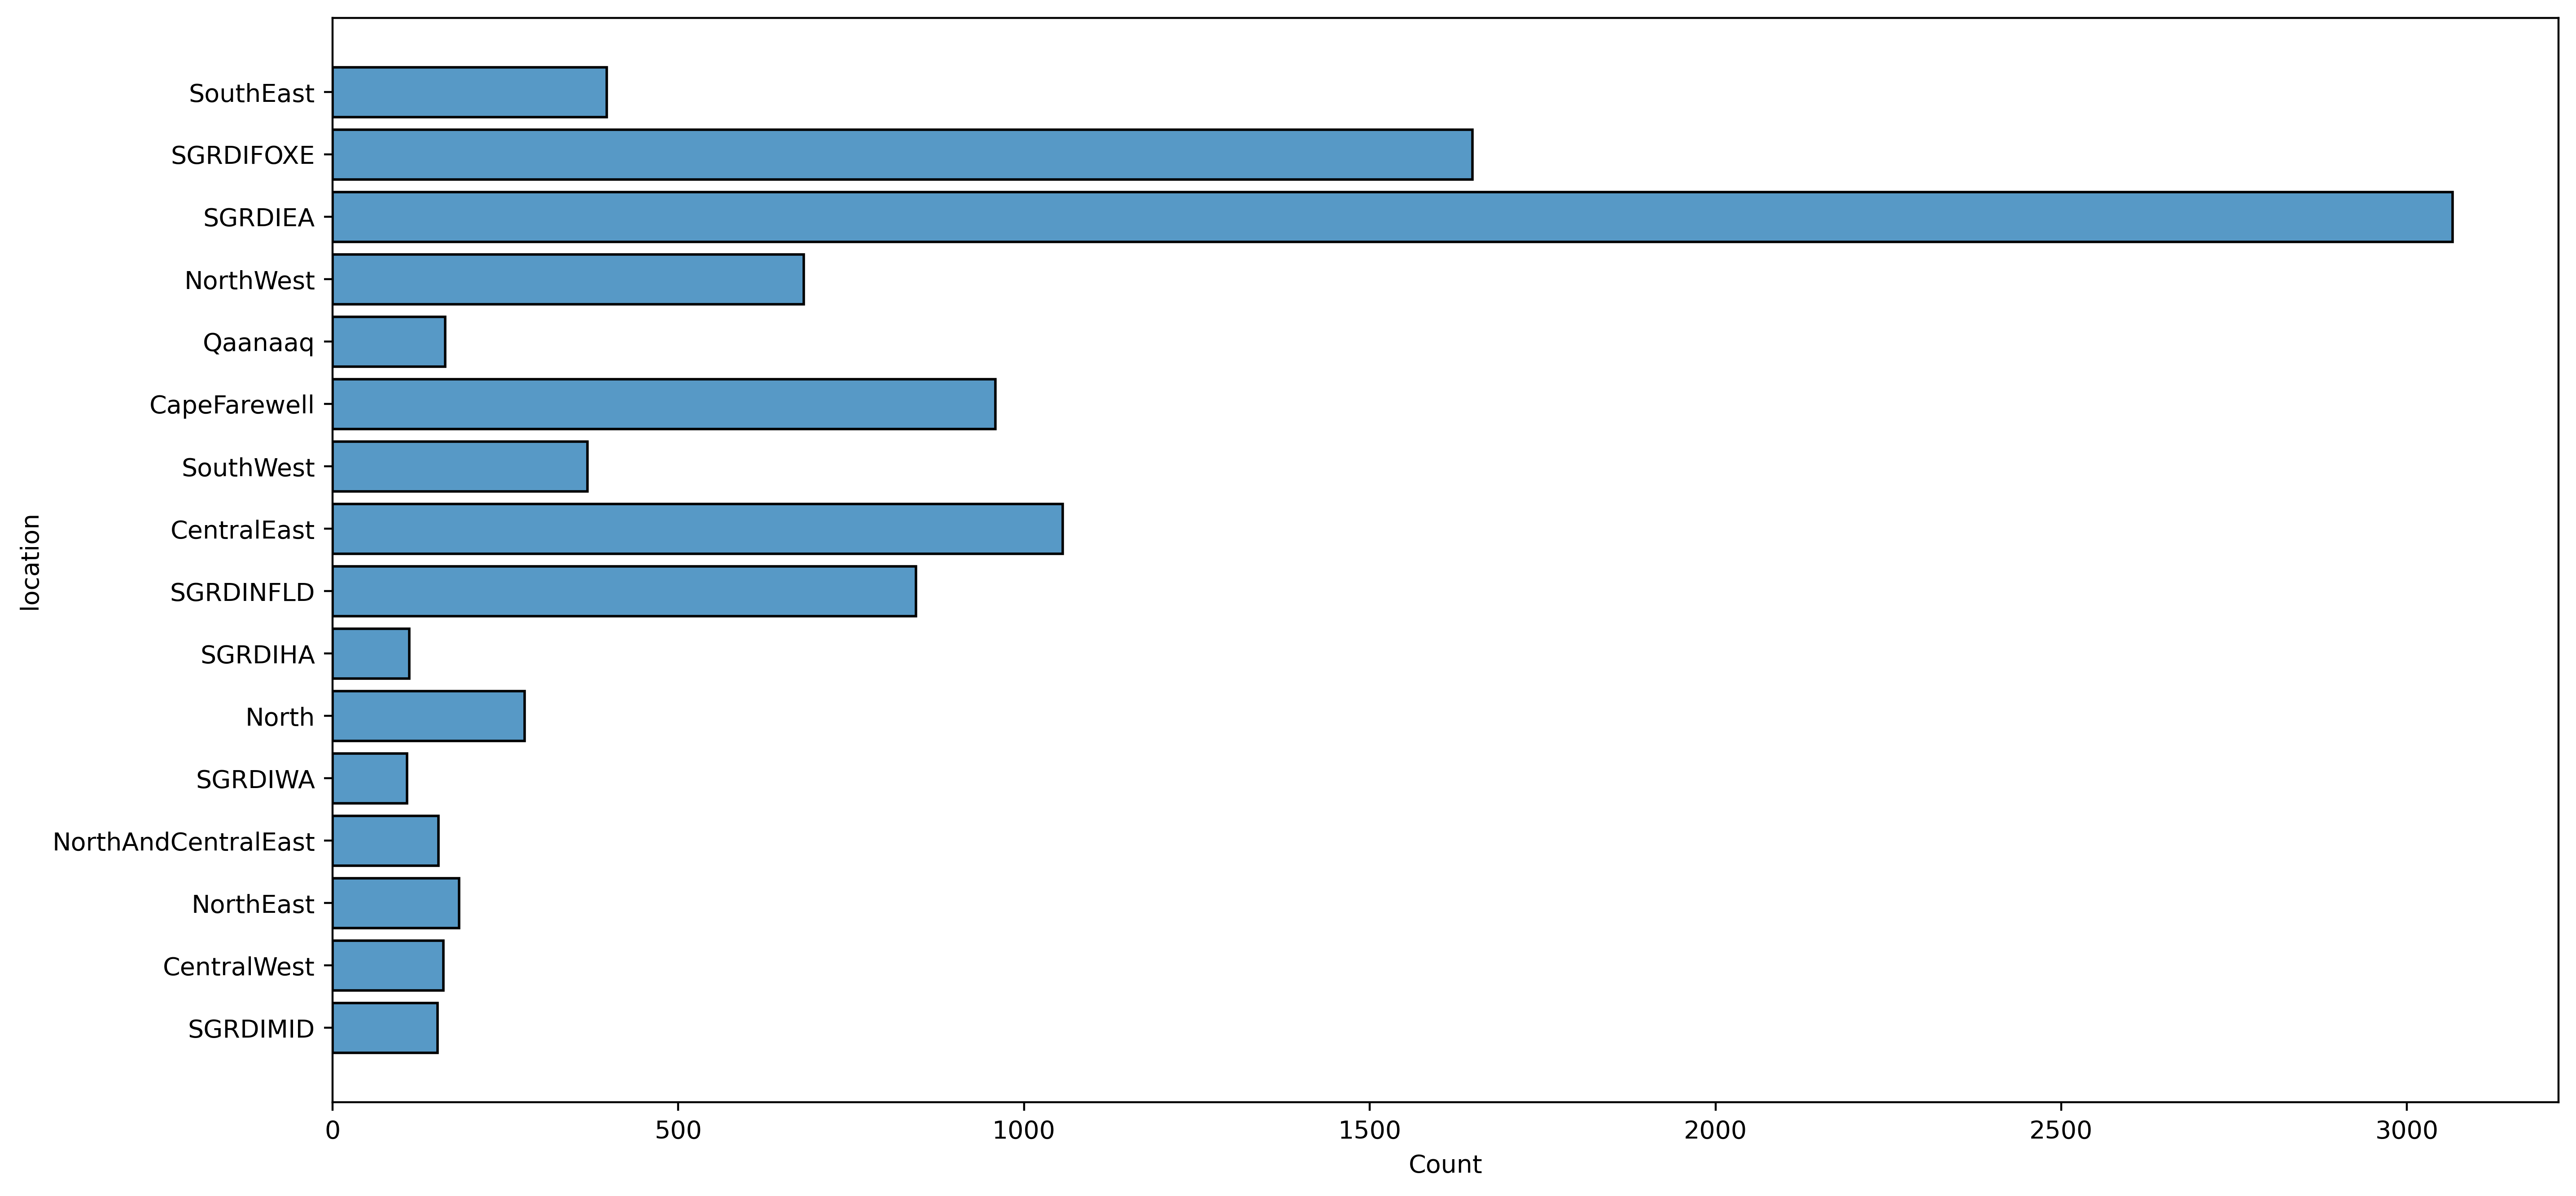

In [5]:
fig, axs = plt.subplots(figsize=(16,8), dpi=400)
sns.histplot(data=metadata_stagioni_best, y='location', weights='loss_combined',
             multiple='stack', shrink=.8)

## Location

In [6]:
count_location = metadata_stagioni_best.groupby('location').count()
count_location

,sentinel_mission_identifier,image_acquisition_start_date,image_acquisition_start_date_year,image_acquisition_start_date_month,image_acquisition_start_date_hour,row_rand,col_rand,sample_n,icechart_provider,epoch_no,...,loss_SIC,loss_SOD,loss_FLOE,loss_combined,score_SIC,ice_characteristcs_SIC,score_SOD,ice_characteristcs_SOD,score_FLOE,ice_characteristcs_FLOE
location,,,,,,,,,,,,,,,,,,,,,
CapeFarewell,394,394,394,394,394,394,394,394,394,394,...,394,394,394,394,391,391,391,391,391,391
CentralEast,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,341,341,341,341,341,341
CentralWest,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,49,49,49,49,49,49
North,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,75,75,75,75,75,75
NorthAndCentralEast,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,31,31,31,31,31,31
NorthEast,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,52,52,52,52,52,52
NorthWest,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,238,238,238,238,238,238
Qaanaaq,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,52,52,52,52,52,52
SGRDIEA,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139,...,1139,1139,1139,1139,1054,1054,1054,1054,1054,1054


In [7]:
sum_location = metadata_stagioni_best.groupby('location').sum()
sum_location

/tmp/ipykernel_373192/2652495569.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_location = metadata_stagioni_best.groupby('location').sum()


,image_acquisition_start_date_year,image_acquisition_start_date_month,image_acquisition_start_date_hour,row_rand,col_rand,sample_n,epoch_no,score_combined,loss_SIC,loss_SOD,loss_FLOE,loss_combined,score_SIC,ice_characteristcs_SIC,score_SOD,ice_characteristcs_SOD,score_FLOE,ice_characteristcs_FLOE
location,,,,,,,,,,,,,,,,,,
CapeFarewell,795705,2780,7880,959236,1039383,1735,13002,21287.581,699.832593,173.823704,85.001912,958.658210,-3539.503,610.0,37726.897,1870.0,38063.112,2126.0
CentralEast,821937,2863,4601,991771,950409,1838,13431,-182554.509,772.655146,193.274449,90.191796,1056.121390,-492975.444,722.0,23650.293,3402.0,25877.798,4187.0
CentralWest,121221,375,885,165164,147607,295,1980,742.594,117.369488,29.860949,12.987420,160.217857,-3860.127,114.0,3743.547,66.0,3946.131,67.0
North,193999,708,779,245631,257667,437,3168,-4265.592,195.731062,58.518136,23.672613,277.921811,-15517.268,274.0,1764.034,645.0,6178.500,669.0
NorthAndCentralEast,108972,551,972,109760,170246,247,1782,672.376,113.390615,26.792435,13.269598,153.452648,35.898,95.0,817.229,51.0,1655.634,307.0
NorthEast,125271,491,551,146723,136481,273,2046,-428.551,133.451071,33.594722,15.822517,182.868312,-5648.759,105.0,2612.530,305.0,3929.710,566.0
NorthWest,565547,2046,5004,601708,733199,1246,9240,-16074.798,480.706246,137.053547,64.020740,681.780532,-68277.458,659.0,18050.661,1330.0,20079.555,1881.0
Qaanaaq,121229,417,907,122383,152550,262,1980,2235.881,124.419628,25.667509,13.142258,163.229395,-692.479,95.0,3960.863,560.0,4642.644,561.0
SGRDIEA,2300316,6350,13910,2586691,2922325,5214,37587,-1216769.848,2236.118103,565.780845,263.910042,3065.809002,-3168398.250,2573.0,86011.291,6892.0,80924.704,10809.0


In [8]:
# check whether it is correct
count_location.sum()

sentinel_mission_identifier           4000
image_acquisition_start_date          4000
image_acquisition_start_date_year     4000
image_acquisition_start_date_month    4000
image_acquisition_start_date_hour     4000
row_rand                              4000
col_rand                              4000
sample_n                              4000
icechart_provider                     4000
epoch_no                              4000
type                                  4000
score_combined                        3622
loss_SIC                              4000
loss_SOD                              4000
loss_FLOE                             4000
loss_combined                         4000
score_SIC                             3622
ice_characteristcs_SIC                3622
score_SOD                             3622
ice_characteristcs_SOD                3622
score_FLOE                            3622
ice_characteristcs_FLOE               3622
dtype: int64

In [9]:
ratio_location = sum_location / count_location
ratio_location

,col_rand,epoch_no,ice_characteristcs_FLOE,ice_characteristcs_SIC,ice_characteristcs_SOD,icechart_provider,image_acquisition_start_date,image_acquisition_start_date_hour,image_acquisition_start_date_month,image_acquisition_start_date_year,...,loss_SOD,loss_combined,row_rand,sample_n,score_FLOE,score_SIC,score_SOD,score_combined,sentinel_mission_identifier,type
location,,,,,,,,,,,,,,,,,,,,,
CapeFarewell,2638.027919,33.0,5.437340,1.560102,4.782609,NaN,NaN,20.0,7.055838,2019.555838,...,0.441177,2.433143,2434.609137,4.403553,97.348113,-9.052437,96.488228,54.443941,NaN,NaN
CentralEast,2335.157248,33.0,12.278592,2.117302,9.976540,NaN,NaN,11.304668,7.034398,2019.501229,...,0.474876,2.594893,2436.783784,4.515971,75.887971,-1445.675789,69.355698,-535.350466,NaN,NaN
CentralWest,2460.116667,33.0,1.367347,2.326531,1.346939,NaN,NaN,14.75,6.25,2020.35,...,0.497682,2.670298,2752.733333,4.916667,80.533286,-78.778102,76.398918,15.154980,NaN,NaN
North,2684.03125,33.0,8.920000,3.653333,8.600000,NaN,NaN,8.114583,7.375,2020.822917,...,0.609564,2.895019,2558.65625,4.552083,82.380000,-206.896907,23.520453,-56.874560,NaN,NaN
NorthAndCentralEast,3152.703704,33.0,9.903226,3.064516,1.645161,NaN,NaN,18.0,10.203704,2018.0,...,0.496156,2.841716,2032.592593,4.574074,53.407548,1.158000,26.362226,21.689548,NaN,NaN
NorthEast,2201.306452,33.0,10.884615,2.019231,5.865385,NaN,NaN,8.887097,7.919355,2020.5,...,0.541850,2.949489,2366.5,4.403226,75.571346,-108.629981,50.240962,-8.241365,NaN,NaN
NorthWest,2618.567857,33.0,7.903361,2.768908,5.588235,NaN,NaN,17.871429,7.307143,2019.810714,...,0.489477,2.434930,2148.957143,4.45,84.367878,-286.880076,75.843113,-67.541168,NaN,NaN
Qaanaaq,2542.5,33.0,10.788462,1.826923,10.769231,NaN,NaN,15.116667,6.95,2020.483333,...,0.427792,2.720490,2039.716667,4.366667,89.281615,-13.316904,76.170442,42.997712,NaN,NaN
SGRDIEA,2565.693591,33.0,10.255218,2.441176,6.538899,NaN,NaN,12.212467,5.575066,2019.592625,...,0.496735,2.691667,2271.019315,4.5777,76.778657,-3006.070446,81.604640,-1154.430596,NaN,NaN


In [10]:
ratio_location.reset_index(inplace=True)
ratio_location

,location,col_rand,epoch_no,ice_characteristcs_FLOE,ice_characteristcs_SIC,ice_characteristcs_SOD,icechart_provider,image_acquisition_start_date,image_acquisition_start_date_hour,image_acquisition_start_date_month,...,loss_SOD,loss_combined,row_rand,sample_n,score_FLOE,score_SIC,score_SOD,score_combined,sentinel_mission_identifier,type
0,CapeFarewell,2638.027919,33.0,5.437340,1.560102,4.782609,NaN,NaN,20.0,7.055838,...,0.441177,2.433143,2434.609137,4.403553,97.348113,-9.052437,96.488228,54.443941,NaN,NaN
1,CentralEast,2335.157248,33.0,12.278592,2.117302,9.976540,NaN,NaN,11.304668,7.034398,...,0.474876,2.594893,2436.783784,4.515971,75.887971,-1445.675789,69.355698,-535.350466,NaN,NaN
2,CentralWest,2460.116667,33.0,1.367347,2.326531,1.346939,NaN,NaN,14.75,6.25,...,0.497682,2.670298,2752.733333,4.916667,80.533286,-78.778102,76.398918,15.154980,NaN,NaN
3,North,2684.03125,33.0,8.920000,3.653333,8.600000,NaN,NaN,8.114583,7.375,...,0.609564,2.895019,2558.65625,4.552083,82.380000,-206.896907,23.520453,-56.874560,NaN,NaN
4,NorthAndCentralEast,3152.703704,33.0,9.903226,3.064516,1.645161,NaN,NaN,18.0,10.203704,...,0.496156,2.841716,2032.592593,4.574074,53.407548,1.158000,26.362226,21.689548,NaN,NaN
5,NorthEast,2201.306452,33.0,10.884615,2.019231,5.865385,NaN,NaN,8.887097,7.919355,...,0.541850,2.949489,2366.5,4.403226,75.571346,-108.629981,50.240962,-8.241365,NaN,NaN
6,NorthWest,2618.567857,33.0,7.903361,2.768908,5.588235,NaN,NaN,17.871429,7.307143,...,0.489477,2.434930,2148.957143,4.45,84.367878,-286.880076,75.843113,-67.541168,NaN,NaN
7,Qaanaaq,2542.5,33.0,10.788462,1.826923,10.769231,NaN,NaN,15.116667,6.95,...,0.427792,2.720490,2039.716667,4.366667,89.281615,-13.316904,76.170442,42.997712,NaN,NaN
8,SGRDIEA,2565.693591,33.0,10.255218,2.441176,6.538899,NaN,NaN,12.212467,5.575066,...,0.496735,2.691667,2271.019315,4.5777,76.778657,-3006.070446,81.604640,-1154.430596,NaN,NaN
9,SGRDIFOXE,2467.992114,33.0,7.642857,2.047619,4.513605,NaN,NaN,11.358044,7.799685,...,0.488436,2.599717,2082.810726,4.544164,79.838083,-347.499786,80.937298,-90.657372,NaN,NaN


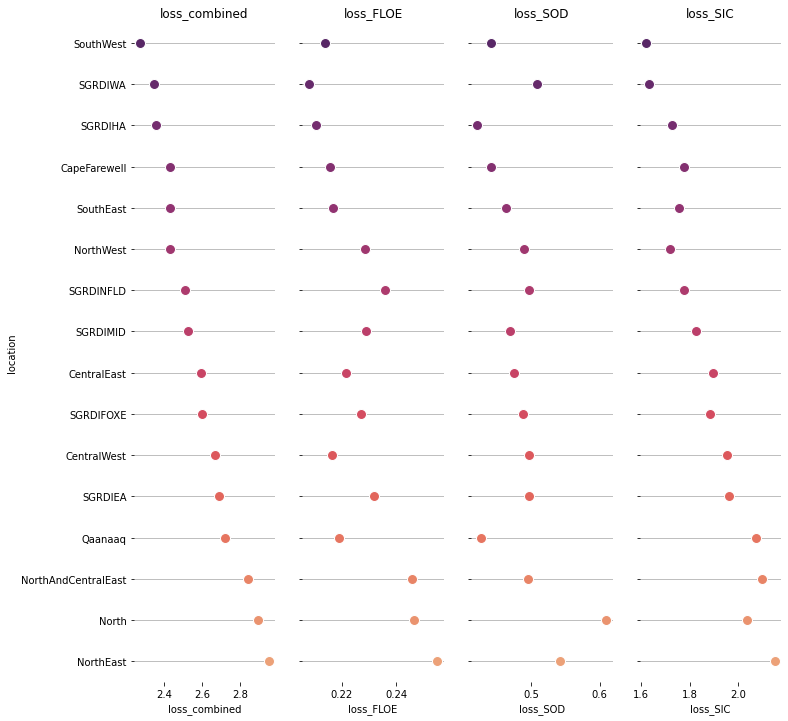

In [11]:
# Make the PairGrid
variables = ['loss_combined', 'loss_FLOE', 'loss_SOD','loss_SIC',]
g = sns.PairGrid(ratio_location.sort_values("loss_combined", ascending=True),
                 x_vars=variables, y_vars=["location"],  # 'score_SIC', 'score_SOD', 'score_FLOE', 'loss_combined',
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# # Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = variables

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

* the loss is badly balanced: the sea ice concentration is dominating the loss even though it's values are the highest in the score
* the more nothern scenes fare the worst, which probably is simply because we choose to train too little on them

## Other important classes

/tmp/ipykernel_373192/177289506.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_icechart_provider = metadata_stagioni_best.groupby('icechart_provider').sum()


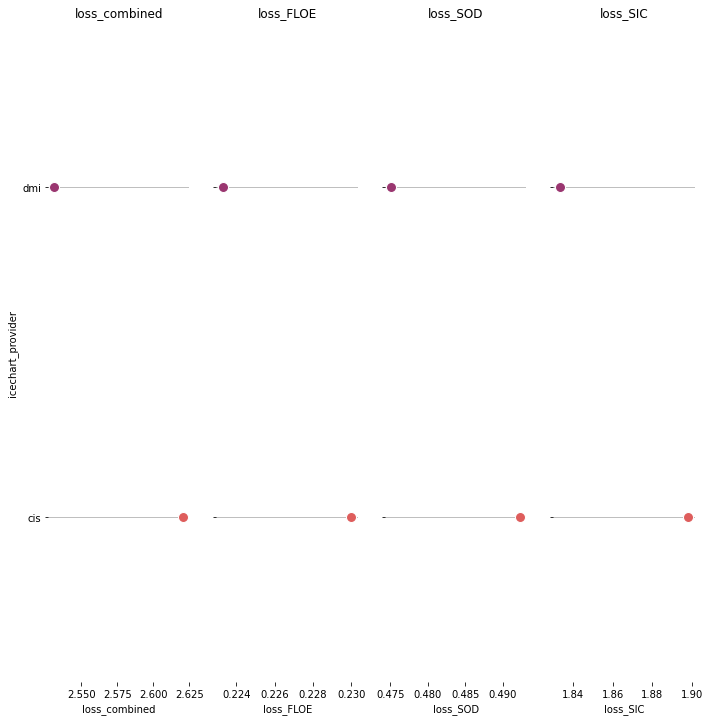

In [12]:
count_icechart_provider = metadata_stagioni_best.groupby('icechart_provider').count() # , 'image_acquisition_start_date_year', 'image_acquisition_start_date_month', 'location']).count()
sum_icechart_provider = metadata_stagioni_best.groupby('icechart_provider').sum()
ratio_icechart_provider = sum_icechart_provider / count_icechart_provider
ratio_icechart_provider.reset_index(inplace=True)

# Make the PairGrid
g = sns.PairGrid(ratio_icechart_provider.sort_values("loss_combined", ascending=True),
                 x_vars=variables, y_vars=["icechart_provider"],  # 'score_SIC', 'score_SOD', 'score_FLOE', 'loss_combined',
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# # Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = variables

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

Predicting for the danish weather service is slightly easier for our model than for the canadian. The effect is less than what I expected, but consistent across metrics.

/tmp/ipykernel_373192/2612808145.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_month = metadata_stagioni_best.groupby('image_acquisition_start_date_month').sum()


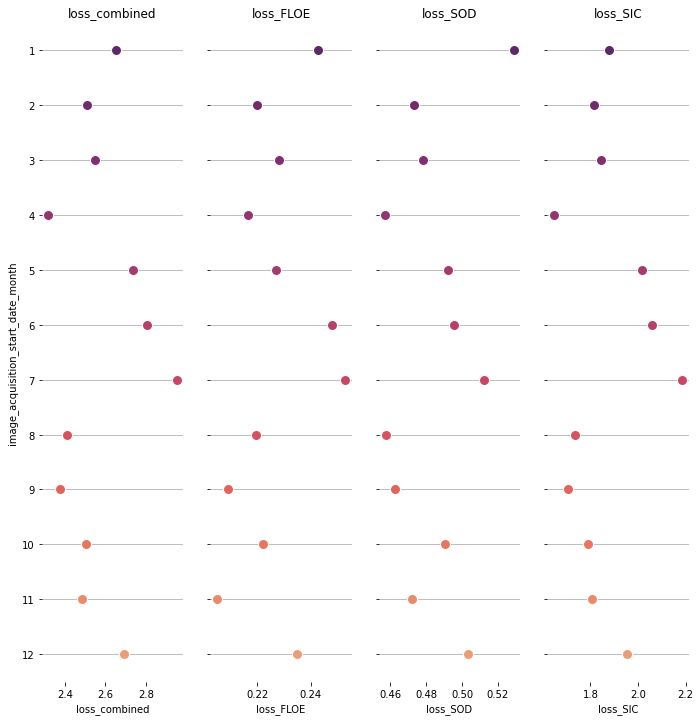

In [13]:
count_month = metadata_stagioni_best.groupby('image_acquisition_start_date_month').count()
sum_month = metadata_stagioni_best.groupby('image_acquisition_start_date_month').sum()
ratio_month = sum_month / count_month
ratio_month.reset_index(inplace=True)

# Make the PairGrid
g = sns.PairGrid(ratio_month.sort_values("loss_combined", ascending=True),
                 x_vars=variables, y_vars=["image_acquisition_start_date_month"],  # 'score_SIC', 'score_SOD', 'score_FLOE', 'loss_combined',
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# # Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = variables

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

There is a strong discrepancy between the predictions across months. However, no clear seasonality can be seen.

## The ice types

In [14]:
count_ice_characteristics_SOD = metadata_stagioni_best.groupby('ice_characteristcs_SOD').count()
sum_ice_characteristics_SOD = metadata_stagioni_best.groupby('ice_characteristcs_SOD').sum()

count_ice_characteristics_FLOE = metadata_stagioni_best.groupby('ice_characteristcs_FLOE').count()

/tmp/ipykernel_373192/3395112046.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_ice_characteristics_SOD = metadata_stagioni_best.groupby('ice_characteristcs_SOD').sum()
